In [1]:
import sys,os 
os.chdir('.\..\..')

In [2]:
import deep_nn.deep_nn_model as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras import optimizers

Using TensorFlow backend.


In [5]:
train100 = pd.read_csv("./data_analysis/projekt1/regression/data.activation.train.100.csv")
test100 = pd.read_csv("./data_analysis/projekt1/regression/data.activation.test.100.csv")
len(train100)

100

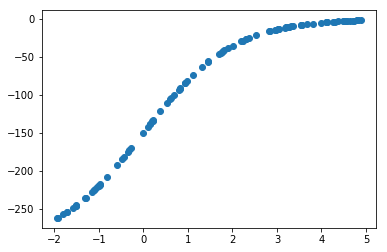

In [6]:
plt.scatter(train100.x, train100.y)

In [7]:
X = train100.x.values.reshape(1, -1)
print(X.shape)
Y = train100.y.values.reshape(1, -1)
print(Y.shape)

(1, 100)
(1, 100)


In [8]:
Xt = test100.x.values.reshape(1, -1)
print(Xt.shape)
Yt = test100.y.values.reshape(1, -1)
print(Yt.shape)

(1, 1201)
(1, 1201)


In [9]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_scaled = X_scaler.fit_transform(train100.x.values.reshape(-1, 1)).reshape(1, -1)
Y_scaled = Y_scaler.fit_transform(train100.y.values.reshape(-1, 1)).reshape(1, -1)
Xt_scaled = X_scaler.transform(test100.x.values.reshape(-1, 1)).reshape(1, -1)
Yt_scaled = Y_scaler.transform(test100.y.values.reshape(-1, 1)).reshape(1, -1)


In [10]:
model_builder = nn.SequentialBuilder()
model_builder.add_dense(1, "relu")
model_builder.add_dense(12, "relu")
model_builder.add_dense(12, "relu")
model_builder.add_dense(12, "relu")
model_builder.add_dense(12, "relu")
model_builder.add_dense(1, "linear")
model = model_builder.compile("MSE")

In [12]:
parameters2, costs = model.fit(X_scaled, 
                      Y_scaled, 
                      learning_rate=0.05,
                      momentum=0.9, 
                      mini_batch_size=64,
                      num_epochs=10000)

Cost after epoch 0: 0.000639
Cost after epoch 1000: 0.000069
Cost after epoch 2000: 0.000028
Cost after epoch 3000: 0.000013
Cost after epoch 4000: 0.000010
Cost after epoch 5000: 0.000009
Cost after epoch 6000: 0.000008
Cost after epoch 7000: 0.000008
Cost after epoch 8000: 0.000010
Cost after epoch 9000: 0.000006


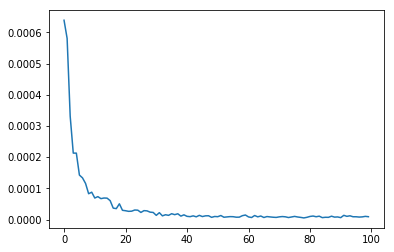

In [13]:
plt.plot(costs)

In [14]:
yp = model.predict(X_scaled)

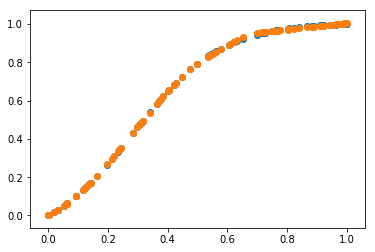

In [15]:
plt.autoscale(enable=True, axis='both', tight=None)
plt.scatter(X_scaled, Y_scaled)
plt.scatter(X_scaled, yp)
plt.show()

In [16]:
yp = model.predict(Xt_scaled)

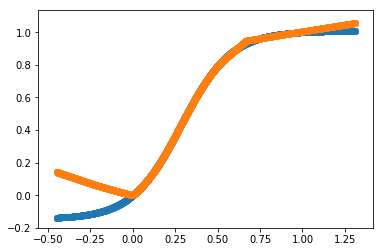

In [17]:
yt = model.predict(Xt_scaled)
plt.autoscale(enable=True, axis='both', tight=None)
plt.scatter(Xt_scaled, Yt_scaled)
plt.scatter(Xt_scaled, yt)
plt.show()

In [12]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    #[1, 12, 12, 12, 12, 1]
    model.add(Dense(1, input_dim=1, kernel_initializer='normal', activation='relu'))
    model.add(Dense(12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    # Compile model
    sgd = optimizers.Adam(lr=0.1)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

In [13]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=1000)


In [14]:
X_s = X_scaled.T
print(X_s.shape)
Y_s = Y_scaled.T
print(Y_s.shape)

(100, 1)
(100, 1)


In [15]:
history = estimator.fit(X_s, Y_s)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.3902
Epoch 2/1000
100/100 [==============================] - 0s 90us/step - loss: 0.1315
Epoch 3/1000
100/100 [==============================] - 0s 100us/step - loss: 0.1241
Epoch 4/1000
100/100 [==============================] - 0s 90us/step - loss: 0.1509
Epoch 5/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1265
Epoch 6/1000
100/100 [==============================] - 0s 100us/step - loss: 0.1237
Epoch 7/1000
100/100 [==============================] - 0s 100us/step - loss: 0.1214
Epoch 8/1000
100/100 [==============================] - 0s 80us/step - loss: 0.1211
Epoch 9/1000
100/100 [==============================] - 0s 80us/step - loss: 0.1210
Epoch 10/1000
100/100 [==============================] - 0s 90us/step - loss: 0.1232
Epoch 11/1000
100/100 [==============

100/100 [==============================] - 0s 90us/step - loss: 0.1219
Epoch 186/1000
100/100 [==============================] - 0s 100us/step - loss: 0.1199
Epoch 187/1000
100/100 [==============================] - 0s 60us/step - loss: 0.1229
Epoch 188/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1218
Epoch 189/1000
100/100 [==============================] - 0s 60us/step - loss: 0.1233
Epoch 190/1000
100/100 [==============================] - 0s 110us/step - loss: 0.1221
Epoch 191/1000
100/100 [==============================] - 0s 90us/step - loss: 0.1210
Epoch 192/1000
100/100 [==============================] - 0s 80us/step - loss: 0.1209
Epoch 193/1000
100/100 [==============================] - 0s 120us/step - loss: 0.1206
Epoch 194/1000
100/100 [==============================] - 0s 100us/step - loss: 0.1226
Epoch 195/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1257
Epoch 196/1000
100/100 [==============================] - 0s 100u

100/100 [==============================] - 0s 70us/step - loss: 0.1211
Epoch 374/1000
100/100 [==============================] - 0s 80us/step - loss: 0.1202
Epoch 375/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1207
Epoch 376/1000
100/100 [==============================] - ETA: 0s - loss: 0.138 - 0s 70us/step - loss: 0.1227
Epoch 377/1000
100/100 [==============================] - 0s 100us/step - loss: 0.1233
Epoch 378/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1212
Epoch 379/1000
100/100 [==============================] - 0s 80us/step - loss: 0.1204
Epoch 380/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1205
Epoch 381/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1253
Epoch 382/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1272
Epoch 383/1000
100/100 [==============================] - 0s 219us/step - loss: 0.1226
Epoch 384/1000
100/100 [===================

100/100 [==============================] - 0s 80us/step - loss: 0.1228
Epoch 563/1000
100/100 [==============================] - 0s 90us/step - loss: 0.1219
Epoch 564/1000
100/100 [==============================] - 0s 60us/step - loss: 0.1269
Epoch 565/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1218
Epoch 566/1000
100/100 [==============================] - 0s 60us/step - loss: 0.1212
Epoch 567/1000
100/100 [==============================] - 0s 60us/step - loss: 0.1209
Epoch 568/1000
100/100 [==============================] - 0s 60us/step - loss: 0.1217
Epoch 569/1000
100/100 [==============================] - 0s 60us/step - loss: 0.1207
Epoch 570/1000
100/100 [==============================] - 0s 60us/step - loss: 0.1303
Epoch 571/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1410
Epoch 572/1000
100/100 [==============================] - 0s 60us/step - loss: 0.1251
Epoch 573/1000
100/100 [==============================] - 0s 70us/ste

100/100 [==============================] - 0s 60us/step - loss: 0.1207
Epoch 753/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1211
Epoch 754/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1199
Epoch 755/1000
100/100 [==============================] - 0s 60us/step - loss: 0.1240
Epoch 756/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1266
Epoch 757/1000
100/100 [==============================] - 0s 140us/step - loss: 0.1202
Epoch 758/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1263
Epoch 759/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1218
Epoch 760/1000
100/100 [==============================] - 0s 60us/step - loss: 0.1257
Epoch 761/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1333
Epoch 762/1000
100/100 [==============================] - 0s 60us/step - loss: 0.1262
Epoch 763/1000
100/100 [==============================] - 0s 70us/st

100/100 [==============================] - 0s 60us/step - loss: 0.1247
Epoch 848/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1236
Epoch 849/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1213
Epoch 850/1000
100/100 [==============================] - 0s 60us/step - loss: 0.1207
Epoch 851/1000
100/100 [==============================] - 0s 90us/step - loss: 0.1207
Epoch 852/1000
100/100 [==============================] - 0s 60us/step - loss: 0.1212
Epoch 853/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1283
Epoch 854/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1271
Epoch 855/1000
100/100 [==============================] - 0s 60us/step - loss: 0.1207
Epoch 856/1000
100/100 [==============================] - 0s 70us/step - loss: 0.1218
Epoch 857/1000
100/100 [==============================] - 0s 110us/step - loss: 0.1227
Epoch 858/1000
100/100 [==============================] - 0s 80us/st

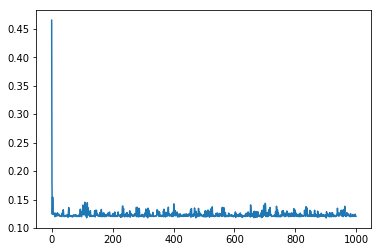

In [65]:
plt.plot(history.history['loss'])

In [66]:
y_pred_keras = estimator.predict(X_s)

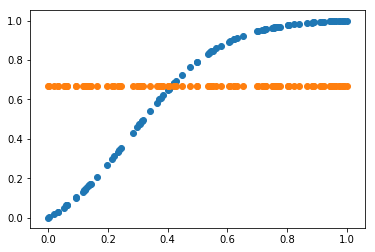

In [67]:
plt.autoscale(enable=True, axis='both', tight=None)
plt.scatter(X_s, Y_s)
plt.scatter(X_s, y_pred_keras)
plt.show()